## IMPORT statements

In [1]:
import sys
print(sys.version)
import numpy as np
print("Numpy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)
import matplotlib.pyplot as plt
#specific to jupyter notebook
%matplotlib inline

3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version: 1.10.1
Pandas version: 0.17.1


## Read csv file and take a short look at it

Note that the file I have used here is the filtered data before we discussed adding more columns.  The filename could be changed, and as long as the new filename represents a version of the same data with at least the same columns as are in this version, all of this code should work exactly the same.

In [2]:
flight_data = pd.read_csv('Flight_Data_Filtered.csv')
flight_data.head()
# look_at.tail(5)
# look_at.size
# look_at.count()
# over 400K rows for each month!
# look_at.index

Year  Month UniqueCarrier  OriginAirportID Origin     OriginCityName  \
0  2015      7            AA            14771    SFO  San Francisco, CA   
1  2015      7            AA            14771    SFO  San Francisco, CA   
2  2015      7            AA            14771    SFO  San Francisco, CA   
3  2015      7            AA            14771    SFO  San Francisco, CA   
4  2015      7            AA            14771    SFO  San Francisco, CA   

  OriginStateName  OriginCityMarketID  DestAirportID Dest  \
0      California               32457          11298  DFW   
1      California               32457          11298  DFW   
2      California               32457          11298  DFW   
3      California               32457          11298  DFW   
4      California               32457          11298  DFW   

            DestCityName DestStateName  DestCityMarketID  ArrDelay  \
0  Dallas/Fort Worth, TX         Texas             30194       -18   
1  Dallas/Fort Worth, TX         Texas             30194       -22   
2  Dallas/Fort Worth, TX         Texas             30194        -6   
3  Dallas/Fort Worth, TX         Texas             30194       -21   
4  Dallas/Fort Worth, TX         Texas             30194       -11   

   ArrDelayMinutes  ArrDel15  
0                0         0  
1                0         0  
2                0         0  
3                0         0  
4                0         0

This is what we created for the proposal.  Since we turned it in, I changed the code to fix the labels, but the content is the same.  

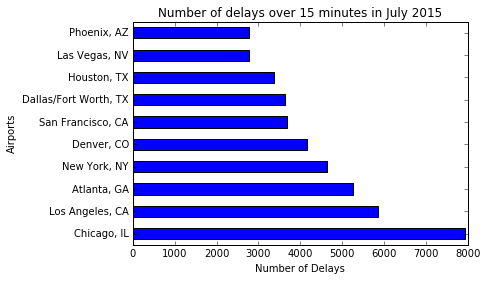

In [3]:
flight_data["ArrDel15"].groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015') \
                                   .set(xlabel="Number of Delays", ylabel="Airports")


plt.savefig('graph1.png')

Below is the analysis again, normalized to show the ratio of arrival delays to overall flights per airport.

@John:  this is one of two graphs it would be great to have confirmed in Tableau

[<matplotlib.text.Text at 0x106d2ff98>, <matplotlib.text.Text at 0x106d22be0>]

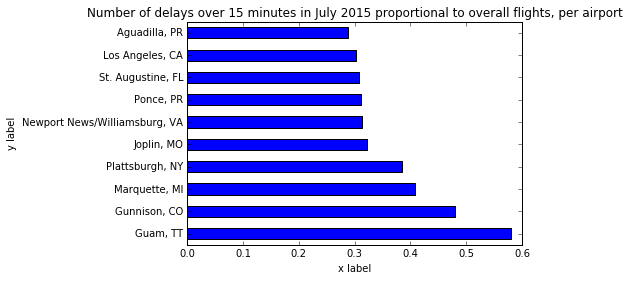

In [4]:
flight_data.ArrDel15.groupby(flight_data.DestCityName) \
                                   .sum() \
                                   .div(flight_data.DestCityName.value_counts()) \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015 proportional to '
                                         'overall flights, per airport') \
                                   .set(xlabel="x label", ylabel="y label")

This graph was also in the proposal.

Below is a graph of the total minutes of delays per airport, for the 10 airports with the highest total minutes of delays.

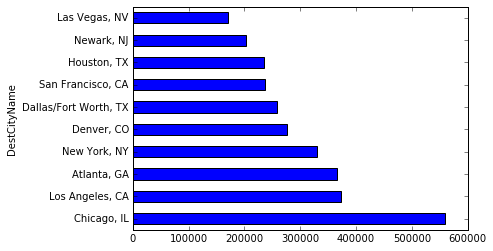

In [5]:
arr_delay = flight_data["ArrDelayMinutes"]
arr_delay.groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh') 
                
plt.savefig('graph2.png')

Below is the average delay per airport (no proportional values regarding total minutes of delay)

@John: this is the second graph for which it would be awesome to have confirmation from Tableau

[<matplotlib.text.Text at 0x10d2681d0>, <matplotlib.text.Text at 0x106d33da0>]

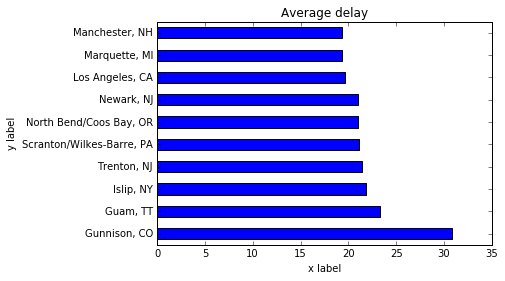

In [6]:
flight_data.ArrDelayMinutes.groupby(flight_data.DestCityName) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay') \
                                   .set(xlabel="x label", ylabel="y label")

Average delay by Unique Carrier (this is the above data with the only change being in the groupby argument)

[<matplotlib.text.Text at 0x10d2f9b70>, <matplotlib.text.Text at 0x109411e48>]

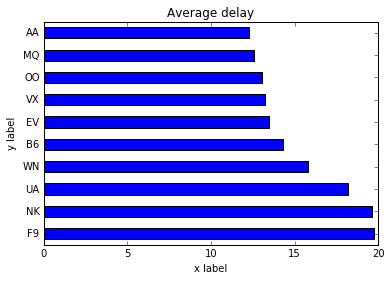

In [7]:
flight_data.ArrDelayMinutes.groupby(flight_data.UniqueCarrier) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay') \
                                   .set(xlabel="x label", ylabel="y label")

#### SF Bay Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the SF Bay Area in July and avoiding long delays is your goal, you're pretty much safe going to any of the three major area airports. SFO wins by a hair, but they're all very close.

In [75]:
sf = flight_data.groupby(['Dest']).ArrDelay.mean()

print("San Francisco:",sf["SFO"],"minutes")
print("Oakland:",sf["OAK"],"minutes")
print("San Jose:",sf["SJC"],"minutes")

San Francisco: 9.05751247979 minutes
Oakland: 10.2854713314 minutes
San Jose: 9.35413333333 minutes


#### NYC Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the NYC Area in July and avoiding long delays is your goal, you're best bet by a longshot is to fly into JFK.

In [86]:
nyc = flight_data.groupby(['Dest']).ArrDelay.mean()

print("Newark:",nyc["EWR"],"minutes")
print("JFK:",nyc["JFK"],"minutes")
print("LaGuardia:",nyc["LGA"],"minutes")

Newark: 13.178526971 minutes
JFK: 2.9417443774 minutes
LaGuardia: 13.9470899471 minutes


#### SF Bay Area Flights: Percentage of flights by airport with a 15+ minutes delay

#### Takeaway: If you're flying to the SF Bay Area in July and seeking the airport that's least likely to have a delay, all three airports have a very similar delay (15+ minutes) profile. Oakland wins by just tenths of a percent, but you're practically as likely to be delayed flying into any of the three SF Bay Area airports.

In [21]:
sf_ratio = flight_data.ArrDel15.groupby(flight_data.Dest) \
                               .sum() \
                               .div(flight_data.Dest.value_counts()) \
        
print("San Francisco:",str(sf_ratio["SFO"] * 100) + "%")
print("Oakland:",str(sf_ratio["OAK"] * 100) + "%")
print("San Jose:",str(sf_ratio["SJC"] * 100) + "%")

San Francisco: 25.52130239%
Oakland: 23.4494274809%
San Jose: 23.6938349007%


#### Takeaway: If you're flying to the NYC Area in July and seeking the airport that's least likely to have a delay (15+ minues), JFK is your best bet. While the ratio of delayed flights is in a tight range for these three aiports, you would want to

In [89]:
nyc_ratio = flight_data.ArrDel15.groupby(flight_data.Dest) \
                                .sum() \
                                .div(flight_data.Dest.value_counts()) \
         
print("Newark:",str(nyc_ratio["EWR"] * 100) + "%")
print("JFK:",str(nyc_ratio["JFK"] * 100) + "%")
print("LaGuardia:",str(nyc_ratio["LGA"] * 100) + "%")

Newark: 26.7460637868%
JFK: 20.5044928007%
LaGuardia: 29.0026385224%


#### Exploration Question: 
If you have to plan a flight from Chicago to Seattle, what carrier should you take to have the best chance of avoiding a delayed arrival (15+ minutes)?

In [51]:
ds = flight_data["Origin"].groupby(flight_data["Origin"])

ds.count()


Origin
ABE      232
ABI      211
ABQ     2045
ABR       62
ABY       77
ACK      139
ACT      149
ACV      122
ACY      341
ADK        9
ADQ       58
AEX      299
AGS      221
AKN       31
ALB      716
ALO       58
AMA      454
ANC     2086
APN       54
ASE      261
ATL    33735
ATW      315
AUS     4301
AVL      342
AVP      145
AZO      130
BDL     1842
BET       85
BFL      257
BGM       61
       ...  
SPI      154
SPS      122
SRQ      241
STL     4613
STT      396
STX      101
SUN      131
SUX       58
SWF       62
SYR      538
TLH      284
TOL       91
TPA     5853
TRI      195
TTN      279
TUL     1285
TUS     1251
TVC      380
TWF       89
TXK       92
TYR      233
TYS      706
UST       13
VLD       87
VPS      540
WRG       62
WYS       53
XNA      933
YAK       62
YUM      177
dtype: int64